In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors,linear_model
from sklearn.datasets import load_digits
import datetime 

**Part-1**

In [2]:
bm_data = pd.read_csv("benchmarks.csv")
display(bm_data.head())

c:\users\os's pc\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
1,cpu95-19990104-03254,102.swim,27.20,34.8
2,cpu95-19990104-03254,103.su2cor,10.10,9.98
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61
4,cpu95-19990104-03254,107.mgrid,8.94,9.44


In [3]:
Yearly_testid=[]
bm_data['testID']=bm_data['testID'].str.extract(r'(-[0-9]+-)', expand=False)
bm_data['testID']= bm_data['testID'].str.replace('-', '')
bm_data = bm_data.dropna()
for i in bm_data['testID']:
    Yearly_testid.append(int(i[:4]))
bm_data['Y_testid']=Yearly_testid
bm_data = bm_data[bm_data['benchName'] == '456.hmmer']
bm_data['testID'] = bm_data['testID'].apply(lambda x: pd.to_datetime(x))
display(bm_data.head())

,testID,benchName,base,peak,Y_testid
45903,2006-05-13,456.hmmer,8.03,8.03,2006
45990,2006-05-13,456.hmmer,8.32,8.51,2006
46019,2006-05-13,456.hmmer,13.40,18.4,2006
46094,2006-05-13,456.hmmer,12.40,17.1,2006
46106,2006-05-13,456.hmmer,12.50,17.1,2006


In [4]:
#Extract the date and base speed for a benchmark of your choice
Y_testid=[]
testid=[]
base=[]
for index, row in bm_data.iterrows():
        testid.append((row["testID"]))
        base.append(float(row["base"]))
        Y_testid.append((row["Y_testid"]))
print(len(base))

3082


In [21]:
base[0]

8.03

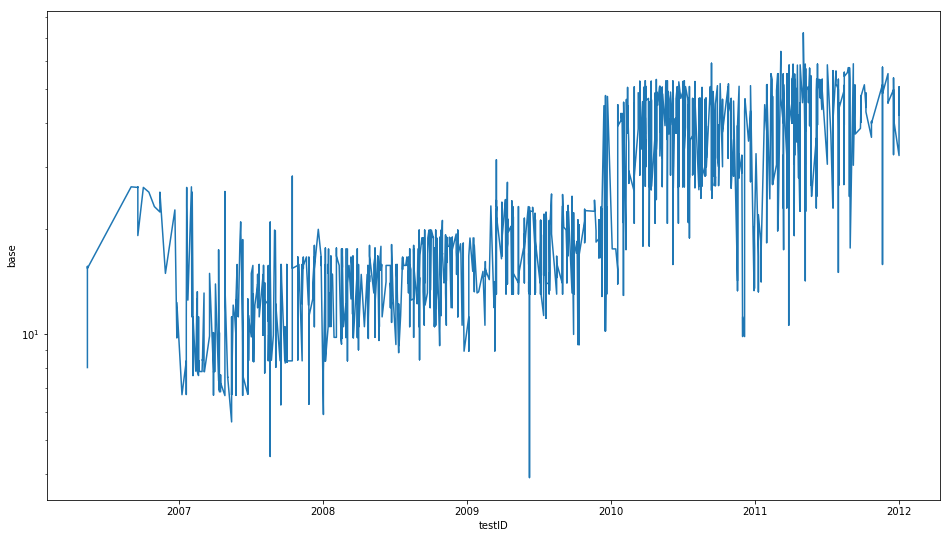

In [141]:
#Plot the data in a semi-log plot
plt.figure(figsize=(16,9))
plt.semilogy(testid, base)
plt.xlabel('testID')
plt.ylabel('base')
plt.show()

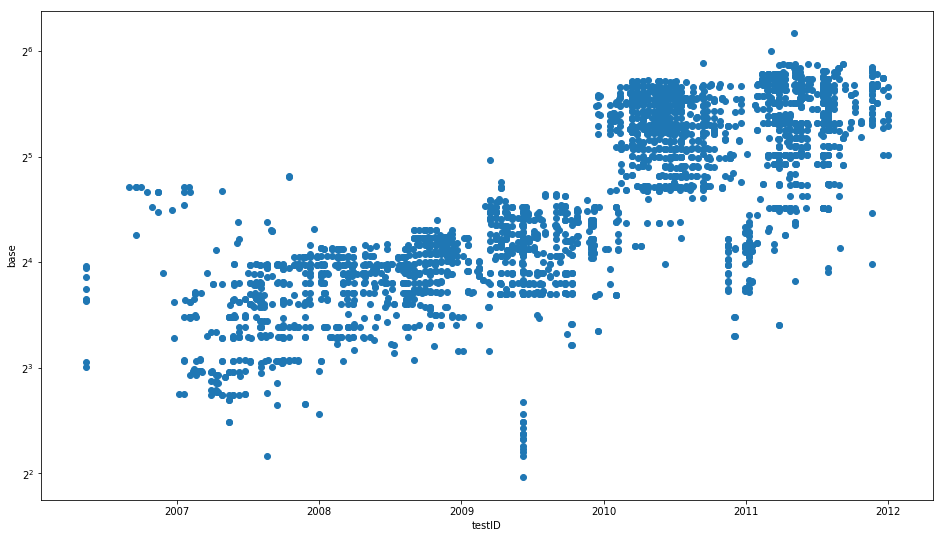

In [5]:
#Plot the data in a semi-log plot using scatter plot. With a base of 2 instead of 10
plt.figure(figsize=(16,9))
plt.scatter(testid, base)
plt.yscale('log',basey=2)
plt.xlabel('testID')
plt.ylabel('base')
plt.show()

In [6]:
#Changing Timestamps into numbers to prepare it for the linear regression model
#for each unique time stamp, the code gives a unique number 
d = {ni: indi for indi, ni in enumerate(set(Y_testid))}
coded_testid = [d[ni] for ni in Y_testid]
#print(len(coded_testid))

In [61]:
print(coded_testid)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [56]:
#train a linear model to fit your plot.

import math
from scipy import stats


#X = np.array(coded_testid).reshape(-1, 1)
Y = np.array(np.log2(base)).reshape(-1, 1)
X=bm_data['testID']
X=X.map(datetime.datetime.toordinal)
X = np.array(X).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)

#base_pred = regr.predict(X)
# coefficients
print("Coefficient: ",regr.coef_, "Intercept: ",regr.intercept_)

Coefficient:  [[0.00134241]] Intercept:  [-980.34786154]


In [69]:
Moorline=[]
for i in coded_testid:
    z=np.log2(2)*i+np.log2(8.3)
    #print(z)
    z=2**(z)
    Moorline.append(z)
print(Moorline)

[8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 8.299999999999999, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.599999999999994, 16.

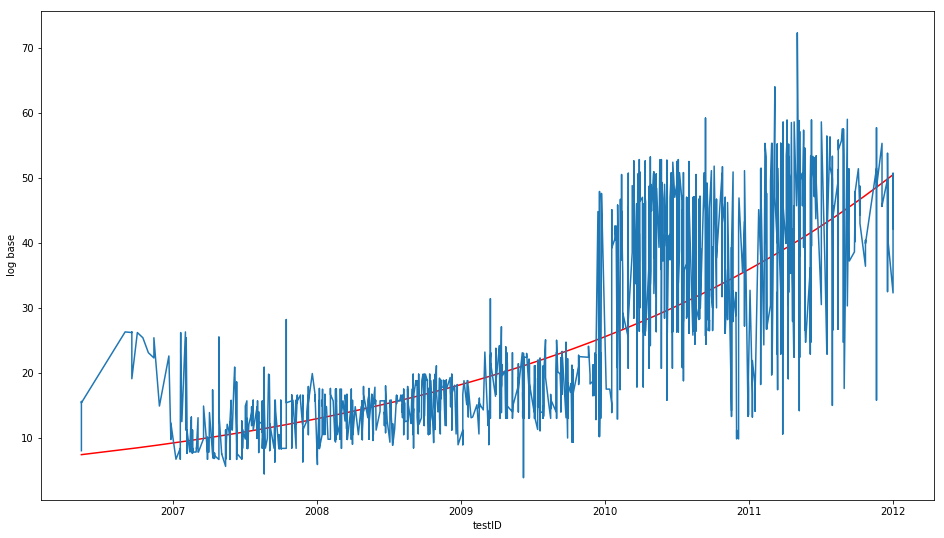

In [75]:
line= 2**(regr.coef_*X+regr.intercept_)

plt.figure(figsize=(16,9))
plt.plot(testid, line,color='red')
#plt.plot(testid, base_pred_2,color='red')
plt.plot(testid,base)
#plt.plot(testid,Mooreline)
#plt.plot(testid, line**2, color='red')
#plt.yscale('log',basey=2)
plt.xlabel('testID')
plt.ylabel('log base')
plt.show()

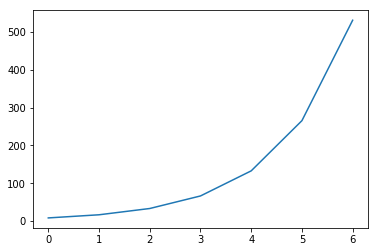

In [76]:
plt.plot(coded_testid,(Moorline))
plt.show()

In my benchName, Moore’s law doesn't hold suffeciently as it increases rapadily with a rule of "np.log2(2)*i+np.log2(first-observation)" which is faster than the speed of the data in my model. 

**Part-2**

In [8]:
#Load Data
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

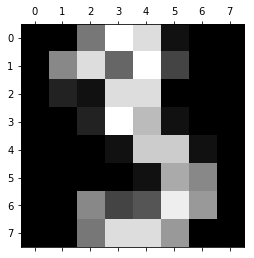

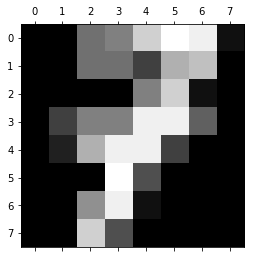

In [10]:
#Plot some of the examples.
plt.gray() 
plt.matshow(digits.images[3]) 
plt.matshow(digits.images[7]) 
plt.show()

In [11]:
#Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.
x=[]
y=[]
for i in range(len(digits.data)):
    if digits.target[i] == 3 or digits.target[i] == 7:
        x.append(digits.data[i])
        y.append(digits.target[i])
print(len(x))

x_train = x[:-90]
x_test = x[-90:]

y_train = y[:-90]
y_test = y[-90:]

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

362


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Manual Calculation of the error rate:", (sum(y_test != y_pred) / len(y_test)))

Mean squared error: 0.16
Variance score: 0.96
Manual Calculation of the error rate: 0.01
